# 02 CNN Basic Modeling

In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'2.10.0'

In [4]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

## 1. 데이터 로드 및 탐색

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

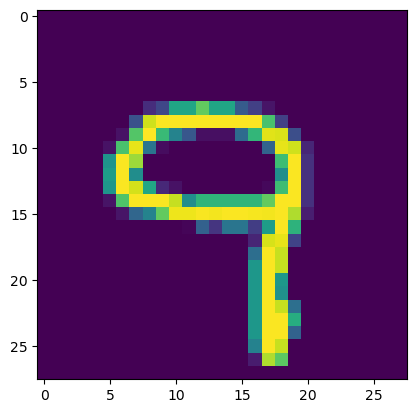

In [6]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[10004])
plt.show()

In [7]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [9]:
# conv layer에 넣어주기 위해서 28x28을 28x28x1 형태로 변경해야한다.
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

In [10]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### 2. 모델 구축
- Filtering 층과 Classification 층으로 구분
- Filtering 층 : Dense 대신 Conv2D, MaxPooling2D 사용
    - Conv2D : 
        - filter개수
        - filter_size
        - stride : default = 1
    - MaxPooling2D : 
        - filter_size
        - stride : default = filter_size

- model.summary()
    - 모델 구조, weight 개수 세기 정답지
    - Output Shape : 피처맵 
    - param # : weight 개수

In [12]:
#모델 구축
model = models.Sequential()
## filtering layer
# conv 2d에 들어오는 데이터는 채널도 들어오기때문에 3차원으로 입력해줘야 한다.
# stride default = 1
# padding default 안준다. 주고싶으면 padding = 'same'
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# filter size 2*2, stride는 default가 filter size(2)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [14]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#모델 학습
model.fit(train_images, train_labels, epochs=3,validation_split=0.2,verbose=1)

Epoch 1/3
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1528 - accuracy: 0.9529 - val_loss: 0.0616 - val_accuracy: 0.9808
Epoch 2/3
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0499 - val_accuracy: 0.9845
Epoch 3/3
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0401 - val_accuracy: 0.9887


In [16]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.0336 - accuracy: 0.9893 - 3s/epoch - 8ms/step
0.989300012588501


## cifar10 dataset 실습

170498071/170498071 [==============================] - 17s 0us/step


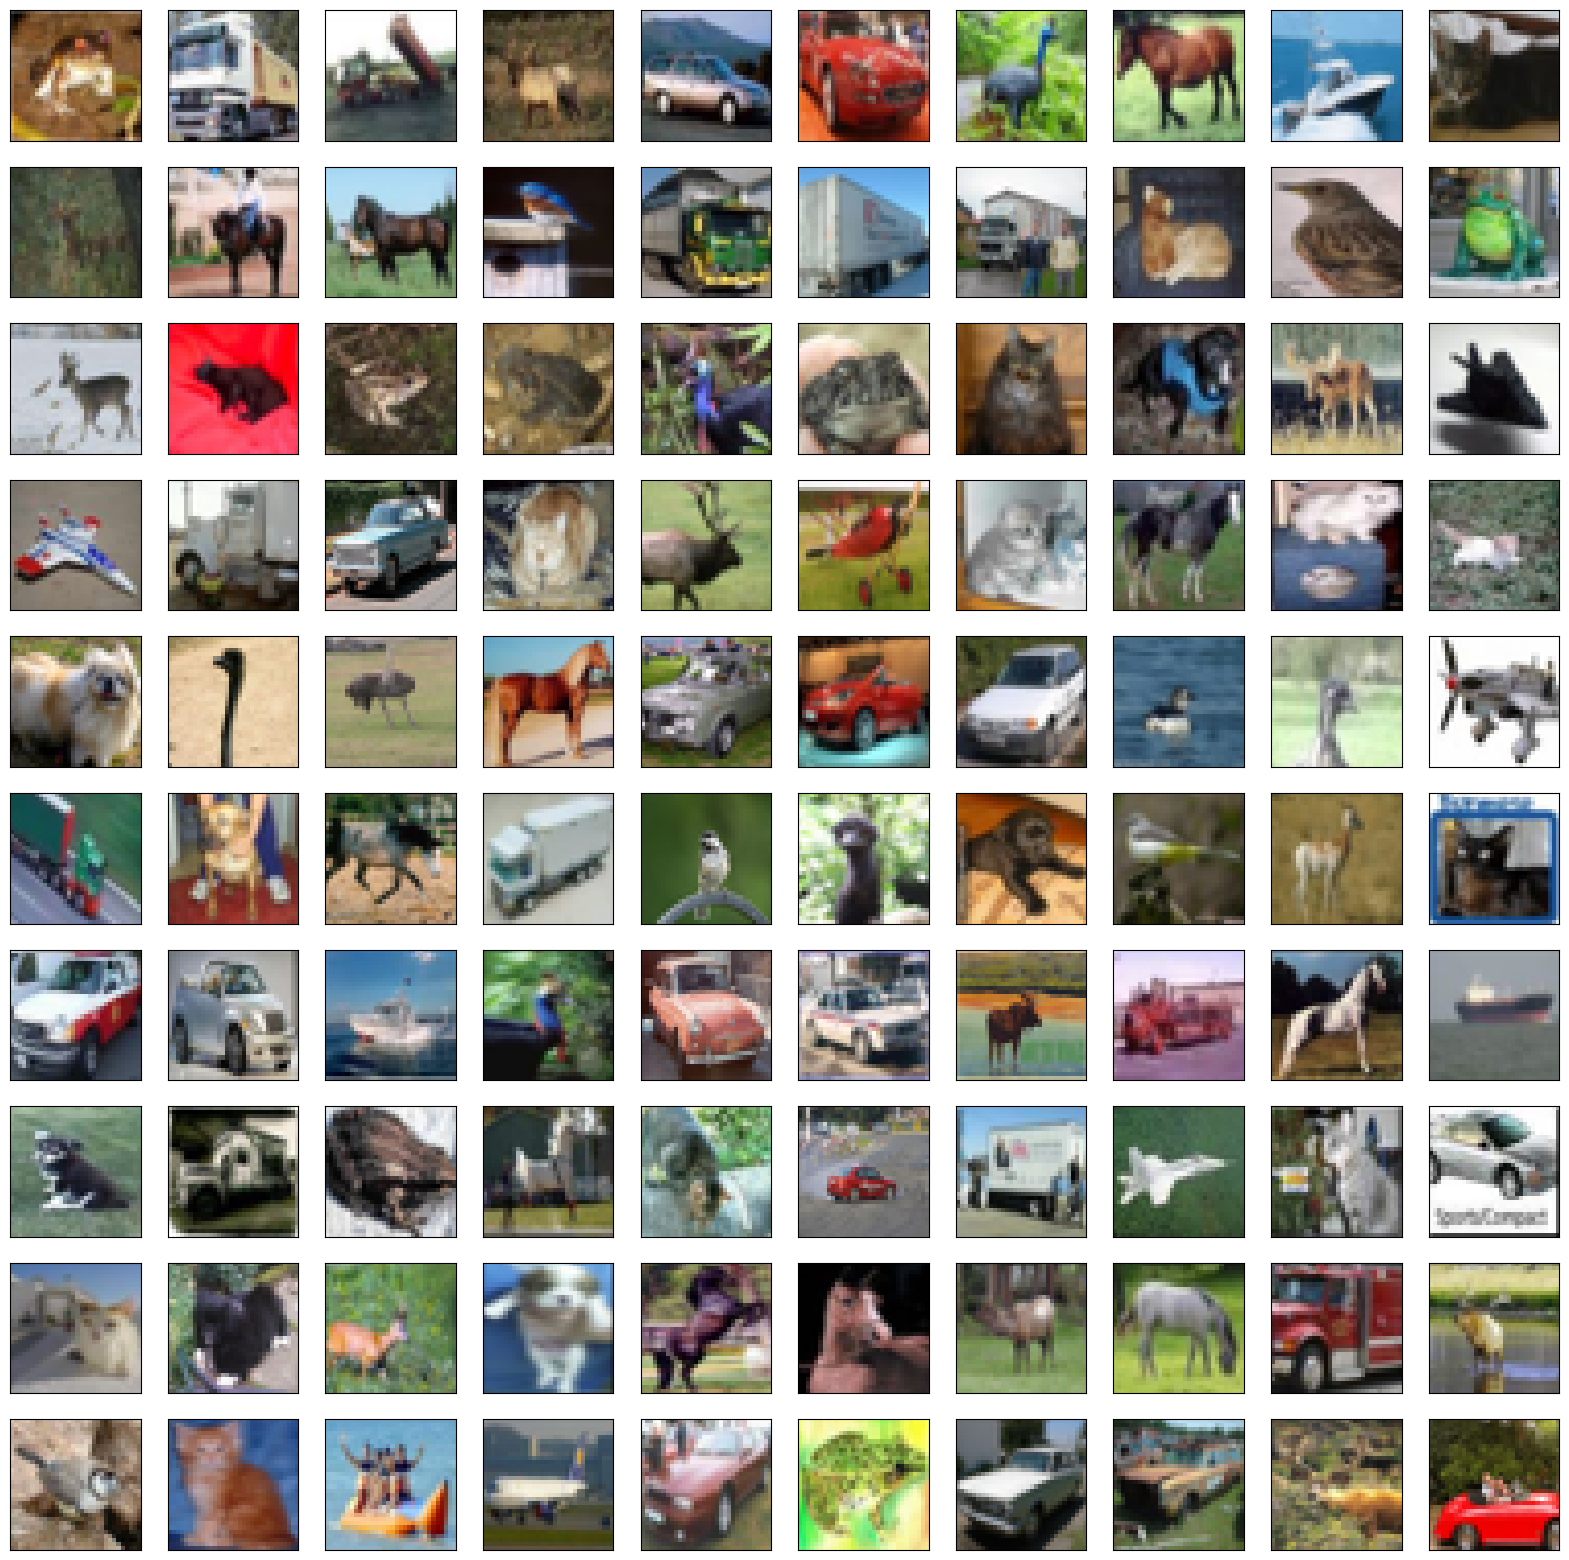

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32,32,3))
test_images = test_images.reshape((10000, 32,32,3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [36]:
model = models.Sequential()
# model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(32, 32, 3), padding = 'same'))
# model.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,verbose=1, batch_size=64,
          validation_split = 0.2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)
# 0.7483000159263611

Epoch 1/10
625/625 [==============================] - 123s 197ms/step - loss: 1.6905 - accuracy: 0.3690 - val_loss: 1.4560 - val_accuracy: 0.4710
Epoch 2/10
625/625 [==============================] - 122s 194ms/step - loss: 1.2167 - accuracy: 0.5615 - val_loss: 1.0608 - val_accuracy: 0.6221
Epoch 3/10
625/625 [==============================] - 120s 192ms/step - loss: 0.9647 - accuracy: 0.6557 - val_loss: 0.9214 - val_accuracy: 0.6743
Epoch 4/10
625/625 [==============================] - 120s 192ms/step - loss: 0.7869 - accuracy: 0.7232 - val_loss: 0.8221 - val_accuracy: 0.7109
Epoch 5/10
625/625 [==============================] - 122s 196ms/step - loss: 0.6464 - accuracy: 0.7712 - val_loss: 0.8341 - val_accuracy: 0.7182
Epoch 6/10
625/625 [==============================] - 122s 195ms/step - loss: 0.5261 - accuracy: 0.8146 - val_loss: 0.8162 - val_accuracy: 0.7270
Epoch 7/10
625/625 [==============================] - 122s 195ms/step - loss: 0.4220 - accuracy: 0.8495 - val_loss: 0.8867 -

In [ ]:
model.summary()

In [ ]:
8 ~    80,000
Epoch 1/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.6337 - accuracy: 0.3953
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.3133 - accuracy: 0.5260
Epoch 3/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.1615 - accuracy: 0.5861
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.0601 - accuracy: 0.6247
Epoch 5/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.9749 - accuracy: 0.6560
Epoch 6/10
1563/1563 [==============================] - 135s 87ms/step - loss: 0.9072 - accuracy: 0.6801
Epoch 7/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.8391 - accuracy: 0.7008
Epoch 8/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7852 - accuracy: 0.7195
Epoch 9/10
1563/1563 [==============================] - 151s 97ms/step - loss: 0.7236 - accuracy: 0.7413
Epoch 10/10
1563/1563 [==============================] - 49196s 31s/step - loss: 0.6646 - accuracy: 0.7610
313/313 - 1s - loss: 1.0582 - accuracy: 0.6615 - 757ms/epoch - 2ms/step
0.6614999771118164


64~    6,441,418
Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.7076 - accuracy: 0.3614
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1811 - accuracy: 0.5759
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9502 - accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8067 - accuracy: 0.7189
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7013 - accuracy: 0.7559
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.6104 - accuracy: 0.7860
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5344 - accuracy: 0.8118
Epoch 8/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4632 - accuracy: 0.8353
Epoch 9/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4040 - accuracy: 0.8589
Epoch 10/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.3468 - accuracy: 0.8769
313/313 - 5s - loss: 0.9570 - accuracy: 0.7332 - 5s/epoch - 17ms/step
0.7332000136375427

Epoch 1/10
625/625 [==============================] - 64s 102ms/step - loss: 1.8182 - accuracy: 0.3088 - val_loss: 1.4080 - val_accuracy: 0.4698
Epoch 2/10
625/625 [==============================] - 62s 99ms/step - loss: 1.1918 - accuracy: 0.5648 - val_loss: 1.0463 - val_accuracy: 0.6289
Epoch 3/10
625/625 [==============================] - 62s 99ms/step - loss: 0.9127 - accuracy: 0.6800 - val_loss: 0.8814 - val_accuracy: 0.6907
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.7432 - accuracy: 0.7415 - val_loss: 0.7923 - val_accuracy: 0.7228
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.6258 - accuracy: 0.7837 - val_loss: 0.8355 - val_accuracy: 0.7200
Epoch 6/10
625/625 [==============================] - 62s 100ms/step - loss: 0.5256 - accuracy: 0.8185 - val_loss: 0.7778 - val_accuracy: 0.7412
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4443 - accuracy: 0.8451 - val_loss: 0.7912 - val_accuracy: 0.7605
Epoch 8/10
625/625 [==============================] - 62s 100ms/step - loss: 0.3641 - accuracy: 0.8719 - val_loss: 0.8240 - val_accuracy: 0.7533
Epoch 9/10
625/625 [==============================] - 62s 99ms/step - loss: 0.3021 - accuracy: 0.8952 - val_loss: 0.8359 - val_accuracy: 0.7612
Epoch 10/10
625/625 [==============================] - 62s 99ms/step - loss: 0.2481 - accuracy: 0.9118 - val_loss: 0.9271 - val_accuracy: 0.7543
313/313 - 5s - loss: 0.9660 - accuracy: 0.7482 - 5s/epoch - 16ms/step
0.748199999332428